# Week 6 Exercises

## Ex 1: Hand In 1 Walk Through
- Explain logistic regression and explain the cost and gradient computation? You can show your code!
- How hard is to to add weight decay regularzation to Logistic Regression and Softmax? How do you update cost and gradient?

## Ex 2:  Maximal Margin By Hand 
- Assume you are given two points $x_1=(1, 1)$ with class -1 and $x_2 = (11, 11)$ with class 1. What is the maximum separating hyperplane. E.g. what are vectors w and b that maximally separates these points? What are the support vectors? What is the margin? Can you find the parameters w, b the SVM wil find without having to do the SVM path and instead just thinking a little. 
- If we have three points in class -1 (-10, -10), (-5, 2), (1, 1) and four points in class 1 (20, 23), (15, 17), (12, 10), (10, 12). What is the separating hyperplane (w,b)? What are the support vectors? What is the margin? You can run the code below to get the answers from actually running the python sklearn SVM implementation on the data.
- Write down the exact form of the SVM problem we need to solve if the input data is defined as the 7 points above.
The convex quadratic program was defined as 

$\min_{w, b} \frac{1}{2}{||w||^2}$

s.t. $y_i(w^\intercal x_i + b) \geq 1$

You job is thus to write down the constraints.




## Ex 3: Regularized SVM (Support Vector machine)

Consider a regularized SVM wrong side of the margin penalty C.

$\min_{w, b, \xi} \frac{1}{2}{||w||^2} + C \sum_{i=1}^n \xi_i$

s.t. $y_i(w^\intercal x_i + b) \geq 1 - \xi_i$

and $\xi_i \geq 0$

Assume you are given three points $x_1=(1, 1)$ with class -1 and $x_2=(3, 3), x_3 = (11, 11)$ with class 1.
- Write down the exact form of the SVM problem we need to solve if the input data $D=\{x_1, x_2, x_3\}$.
  Thus, your job is thus to write down the constraints.

- What is the best cost you can get when using the hyperplane $w = [ 0.1, 0.1]$ and  $b: -1.2$. i.e. how can you pick $\xi_1, \xi_2, \xi_3$ such that the constraints are satisfied while minimizing the cost with w and b  fixed.

- Is there a general way given, $w$ and $b$ to compute the best $\xi_i$ 
- Can you find a $w, b$ with a smaller cost for $C=1$
  If you like you can use the svm code below to experiment.
  
Also be sure to see how to apply an SVM implementation on data using Sklearn.


First Exercise From Above
Hyperplane found w: [0.1 0.1] b: -1.1999999999999997
Margin 1/||w||: 7.071067811865474
Support Vectors:
[[ 1.  1.]
 [11. 11.]]
what is hyp [-1.2  0.1  0.1]


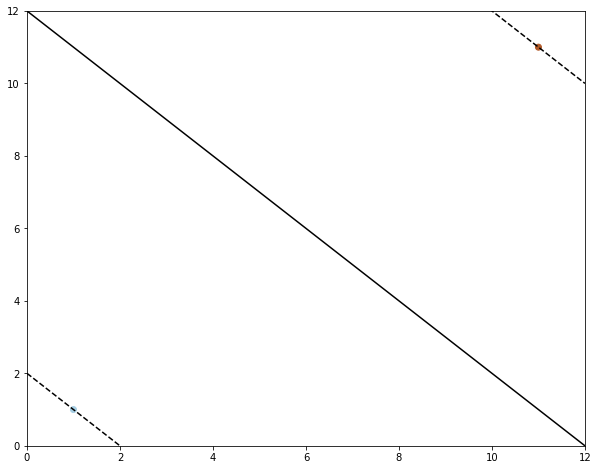

Second Exercise From Above
Hyperplane found w: [0.09991352 0.1001057 ] b: -1.2001473355844554
Margin 1/||w||: 7.070385165969472
Support Vectors:
[[ 1.  1.]
 [12. 10.]
 [10. 12.]]
what is hyp [-1.20014734  0.09991352  0.1001057 ]


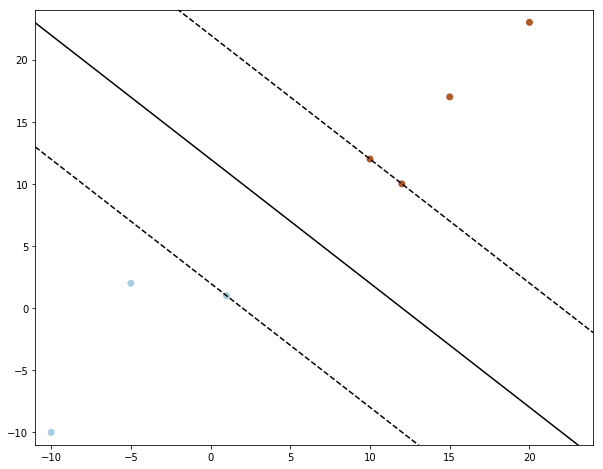

In [4]:
# code for running the example above
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_hyperplane(w, *args, **kwargs): 
    if w[1]==0 and w[2]==0:
        raise ValueError('Invalid hyperplane')
    xmin, xmax, ymin, ymax = plt.axis()
    
    if w[2]==0:
        # Vertical line
        x = np.array((1/w[1], 1/w[1]))
        y = np.array((ymin, ymax))
    else:
        x = np.array((xmin, xmax))
        y = (-w[0]-w[1]*x)/w[2]       
    # plot the line
    plt.plot(x, y, *args, **kwargs)

def run_svm(X, Y, kernel='linear', **kwargs):
    # fit the model
    clf = svm.SVC(kernel=kernel, **kwargs)
    clf.fit(X, Y)

    # get the separating hyperplane
    
    print('Hyperplane found w: {0} b: {1}'.format(clf.coef_[0],clf.intercept_[0]))
    margin = 1.0/np.linalg.norm(clf.coef_[0])
    print('Margin 1/||w||: {0}'.format(margin))
    hyp = np.r_[clf.intercept_,clf.coef_[0]] # row-wise merging. 
    
    plt.figure(figsize=(10, 8))
    #print("X ", X)
    #print("X[:, 0] ", X[:, 0])
    plt.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.cm.Paired)
    print('Support Vectors:')    
    print(clf.support_vectors_)
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
    plt.xlim(X.min()-1,X.max()+1)
    plt.ylim(X.min()-1,X.max()+1)
    plot_hyperplane(hyp,'k-')
    
    print('what is hyp',hyp)
    tmp = hyp[0]
    hyp[0] = tmp + 1
    plot_hyperplane(hyp,'k--')
    hyp[0] = tmp -1
    plot_hyperplane(hyp,'k--')
    hyp[0] = tmp
    
    #plt.axis('tight')
    plt.show()

X = np.array([[1, 1], [11, 11]])
Y = np.array([0, 1])
print('First Exercise From Above')
run_svm(X, Y, C=1)
plt.show()

print('Second Exercise From Above')
X = np.array([(-10, -10), (-5, 2), (1, 1),  (20, 23), (15, 17), (12, 10), (10, 12)])
Y = np.array([0, 0, 0, 1, 1, 1, 1])
run_svm(X, Y)
plt.show()

# print('Larger Separable Data set')
# n = 50
# X = 2*np.r_[2*np.random.randn(n, 2) - [4, 4], 2*np.random.randn(n, 2) + [5, 5]]
# Y = [-1] * n + [1] * n
# run_svm(X, Y)
# plt.show()

## Ex 4: Kernels
In class, we saw that it was often possible to compute $K(x, z) = \langle \phi(x), \phi(z) \rangle$ without using or knowing $\phi$, and implicitly map
data to a high dimensional space, and have the SVM algorithm work in that space. One
way to generate kernels is to explicitly define the mapping $\phi$ to a higher dimensional space,
and then work out the corresponding $K$ if possible.

In this question we are interested in direct construction of kernels. I.e., suppose
we have a function $K(x, z)$ that we think gives an appropriate Kernel for our
learning problem, and we are considering plugging K into the SVM as the kernel function.
However for $K(x, z)$ to be a valid kernel, it must correspond to an inner product in some
higher dimensional space resulting from some feature mapping $\phi$. Mercer’s theorem tells
us that $K(x, z)$ is a (Mercer) kernel if and only if for any finite set $\{x_1,\dots, x_m\}$, the
matrix $K$ is symmetric and positive semidefinite, where the square matrix 
$K \in R^{m \times m}$ is
given by $K_{ij} = K(x_i, x_j)$

Now here comes the questions: 
Let $K_1, K_2$ be kernels over $R^n \times R^n$, let $a \in R_+$ be a positive
real number, let $f : R^n \rightarrow R$ be a real-valued function, 
let $\phi : R^n \rightarrow R^d$ be a function mapping from $R^n$ to $R^d$
let $K_3$ be a kernel over $R^d \times R^d$
and let p(x) a polynomial over x with positive coefficients.

For each of the functions K below, state whether it is necessarily a kernel. If you think it
is, prove it (give feature transform or prove PSD); if you think it isn’t, give a counter-example.
* $K(x, z) = K_1(x, z) + K_2(x, z)$ 
* $K(x, z) = aK_1(x, z)$
* $K(x, z) = K_1(x, z) − K_2(x, z)$
* $K(x, z) = −aK_1(x, z)$
* $K(x, z) = f(x)f(z)$

### Harder
* $K(x, z) = K_3(\phi(x), \phi(z))$
* $K(x, z) = K_1(x, z)K_2(x, z)$ (Hard Exercise: may be hard to prove - if so ignore)
* $K(x, z) = p(K_1(x, z))$







## Ex 5: Kernel Speed
In this exercise we will test if if using Kernels is indeed faster than doing the transform explicitly.

Your task is to fit a polynomial kernel svm with degree 2 on the data and try to do a feature transform of degree 2 and run a linear svm and compare the time.

Use timeit to compare time, only consider the fit time.

Use sklearns polynomial transform to do the [polynomial transform](http://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features)


In [9]:
import timeit
import os 
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

def load_test_data():
    """ Load and return the test data """
    filename = 'auTest.npz';
    if not os.path.exists('auTest.npz'):
        os.system('wget https://users-cs.au.dk/jallan/ml/data/auTest.npz')        
    tmp = np.load('auTest.npz')
    au_digits = tmp['digits']
    print('shape of input data', au_digits.shape)
    au_labels = np.squeeze(tmp['labels'])
    print('labels shape and type', au_labels.shape, au_labels.dtype)
    return au_digits, au_labels

D, y = load_test_data()
n = 400
Ds = D[0:n, :]
ys = y[0:n]
# use only Ds and ys

def poly_fit(X, y, kernel, degree):
    clf = svm.SVC(kernel=kernel, degree=degree)
    clf.fit(X, y)
    return clf

# You can use poly fit with kernel='poly' and degree =2
# kernel='linear' and degree = 1 i.e. timeit poly_fit ...
### YOUR CODE HERE
poly = PolynomialFeatures(degree=2, interaction_only=True)
res = poly.fit_transform(Ds)
# print(res)
%timeit poly_fit(Ds, ys, kernel='poly', degree=2)
%timeit poly_fit(Ds, ys, kernel='linear', degree=1)
### END CODE


shape of input data (2580, 784)
labels shape and type (2580,) int64
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
196 ms ± 819 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
72.8 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Ex 6: Hinge Loss - Cost and Gradient
In class we talked about that we could rewrite the primal problem (with no kernels) into an unconstrained minimization problem using hinge loss.
For a hypothesis and data point $x$ the hinge loss is defined as
$$
e(h(x), y=f(x)) = \max(0, 1-h(x)y)
$$
Define the (average regularized) hinge loss  over the data set as
$$
\min_{w, b}: \frac{1}{n} \sum_{i=1}^n \max(0, 1-h(x_i)y_i) + \lambda ||w||^2 = \frac{1}{n} \sum_{i=1}^n \max(0,1 -(w^\intercal x_i +b) y_i) + \lambda ||w||^2
$$
What is the relation between the SVM penalty $C$ and $\lambda$

To make a gradient descent algorithm for Hinge Loss for a linear model which you must
compute the cost and the gradient. Write the code for computing the Hinge Loss and the Gradient at a given value $w$ and $\lambda$ in the hinge_loss method in the cell below. You should derive the math formula for the gradient before you implement it!.





(we know max is not smooth at zero but let us ignore that and say that the gradient is zero at zero, for more  go to wikipedia and look up subgradient).


In [11]:
n = 50
X = 2*np.r_[2*np.random.randn(n, 2) - [4., 4.], 2*np.random.randn(n, 2) + [5., 5.]]
#print(X)
Y = np.array([-1] * n + [1] * n)
#print(Y)


def hinge_loss(X, y, w, b, reg):
    """ Compute hinge loss on data with given parameters
    
    Args:
        X: np.array shape n,d 
        y: np.array shape n, 
        w: np.array shape d,
        b: is float
        reg: is float        
    Returns:
    output scalar, grad_w np.array shape d, grad_b scalar
    """
    loss = 0
    reg_loss = 0
    grad_w = np.zeros(w.shape)
    grad_b = 0
    
    ### YOUR CODE HERE - compute loss, reg_loss, grad_w, grad_b
    
    ### END CODE

    assert grad_w.shape == w.shape    
    return loss + reg_loss, grad_w, grad_b

w = np.array([-1, -1])
b = 1.0
reg = 1.0
reg_loss, grad_w, grad_b = hinge_loss(X, Y, w, b, reg)
print('hinge loss: ', reg_loss, 'hinge grad_w: ', grad_w, 'hinge grad_b:', grad_b)

hinge loss:  0 hinge grad_w:  [0. 0.] hinge grad_b: 0


# Ex 7: Hinge Loss Gradient Descent In Pytorch
In this exercise we will see how to use pytorch build in optimizer class to do gradient descent for Hinge Loss.
You can read about the torch optim class that implements most SGD algorithm variants [here](https://pytorch.org/docs/stable/optim.html)
1. Implement Hinge Loss in Pytorch in method hinge_loss - only the cost from above using torch functionality and not numpy
2. Test your your implementation from this and the previous exercise by checking that the cost and gradient are the same for both implmentations. In particular check that the gradient from above matches the gradient produced by pytorch.
3. Test that the pytorch gradient descent finds the minimum (fast) and notice how to apply the optimizer.

In [25]:
import torch
import torch.optim as optim
import numpy as np


hinge_data = torch.from_numpy(X).float()
hinge_labels = torch.from_numpy(Y).float()
w = torch.tensor([-1., -1], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)
reg = 1.0

def hinge_loss(data, labels, w, b, lbd):
    """
    Compute Hinge Loss on Torch tensors
    torch.sum and x.clamp may com in usefull
    https://pytorch.org/docs/master/torch.html#torch.clamp
    """
    ### YOUR CODE HERE
    out = torch.clamp(data,0,10)
    ### END CODE
    return out

print('Check your computations')
loss = hinge_loss(hinge_data, hinge_labels, w, b, reg)
loss.backward()
print('check gradient loss: ', loss.item(),'w grad: ', w.grad, 'b grad:', b.grad)

steps = 5
optimizer = optim.SGD([w, b], lr = 0.1)
for i in range(steps):
    optimizer.zero_grad() # clears gradients otherwise they are accumulated
    loss = hinge_loss(hinge_data, hinge_labels, w, b, 0)
    loss.backward()
    acc = torch.sum(((hinge_data @ w + b) * hinge_labels)>0)
    print('round: {0}, loss: {1}, accuracy: {2}'.format(i, loss.item(), acc.item()))
    optimizer.step() # take a gradient step
print('Learned w and b', w, b)

Check your computations


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

## Ex 8: String Kernel with Sklearn 
In this exercise you must apply SVM for text classification by using a Bag Of Words String Kernel on the industri code data we have seen several times.

The bag of words Kernel $K$ we will use is defined as follows
Given two strings x, z (lists of words separated by space) the Kernel K is defined as the number of distinct words that appear in both x and z
Thus K('a b c a', 'a a b d') = 2 since $a$ and $b$ are the only words that appear in both inputs.

Expain which feature transform this corresponds to?

Unfortunately Sklearns implementation of SVMs except the input to be numerical values.
We circumvent this issues by making an index that maps an integer key to the string and encode our data sets as an array of indices.

The Kernel receives this  encoding of the data set and must from the indices extract the required strings and apply the Kernel to them.

Your task is to implement the bow_kernel below!

Note that SVM expect a vectorized Kernel implementation that takes as input two numpy arrays $X, Z$ with shape $(n_1, d)$ and $(n_2, d)$  and outputs the Kernel matrix $K$ of size $n_1 \times n_2$ where $K_{i,j} = K(X[i], Z[j])$, thus your implementation must be vectorized as well.

1. Implement the bow_kernel
2. Manually compute the bow kernel matrix on the simple test, data_dict[-1], data_dict[-2], data_dict[-3]
3. Test your implementation gets the same result (add 
4. Run the SVM and see if it works (comment in the code - may take some time) - we get an in sample accuray around 98 percent and out of sample around 95 percent.

In [21]:
from sklearn import svm
import os, urllib
from sklearn.model_selection import train_test_split
import pandas as pd

def load_branche_data(keys):
    """
    Load the data in branche_data.npz and save it in lists of
    strings and labels (whose entries are in {0,1,..,num_classes-1})
    """
    filename = 'branchekoder_formal.gzip'
    if not os.path.exists(filename):
        with open(filename, 'wb') as fh:
            path = "http://users-cs.au.dk/jallan/ml/data/{0}".format(filename)
            fh.write(urllib.request.urlopen(path).read())
    data = pd.read_csv(filename, compression='gzip')
    actual_class_names = []
    features = []
    labels = []
    for i, kv in enumerate(keys):
        key = kv[0]
        name = kv[1]
        strings = data[data.branchekode == key].formal.values
        features.extend(list(strings))
        label = [i] * len(strings)
        labels.extend(label)
        actual_class_names.append(name)
    assert len(features) == len(labels)
    features = np.array(features)
    labels = np.array(labels)
    return features, labels, actual_class_names


keys = [(561010, 'Restauranter'), (620100, 'Computerprogrammering')]
features, labels, actual_class_names = load_branche_data(keys)
# Hack to get around sklearn svm issues. Fit only supports numpy arrays so each string is represented by index in data_dict
data_dict = {i: string for (i, string) in enumerate(features)}
feature_indices = np.array(list(data_dict.keys())).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(feature_indices, labels)

def bow_kernel(d1, d2):
    """ bag of words kernel
    
    Args:
    d1: np.array shape (n1, 1)
    d2: np.array shape (n2, 1)
    
    
    the split command may be very useful 'i am a string'.split(' ')
    and the set data structure may be useful as well
    
    returns np.array shape (n1, n2)
    """
    n1 = d1.shape[0]
    n2 = d2.shape[0]
    out = np.zeros((n1, n2))
    # d1_1 = data_dict[d1[0][0]]
    # print('frist string id d1: ', d1_1)
    ### YOUR CODE HERE data_dict[d1[0][0]] gives the first string
    print("D1: ", d1)
    print("d1[1][0]: ", d1[0][0])
    print("data_dict[d1[0][0]]", data_dict[d1[0][0]])
    print("D2: ", d2)
    
    ### END CODE
    return out
data_dict[-1] = 'test string 42'
data_dict[-2] = 'another test string 32'
data_dict[-3] = 'can you dig it'

print('Lets test kernel before we run the learning algorithm. You should be able to check the answer manually')
bow_kernel_test = bow_kernel(np.array([-1, -2, -3]).reshape(-1, 1), np.array([-1, -2, -3, -2]).reshape(-1, 1))
print(bow_kernel_test)

# print('*'*10, 'Lets fit string kernel svm', '*'*10)
# bow_svm = svm.SVC(kernel=bow_kernel)
# bow_svm.fit(X_train, y_train)
# print('In Sample Score: ', bow_svm.score(X_train, y_train))
# print('Out of Sample Score: ', bow_svm.score(X_test, y_test))


Lets test kernel before we run the learning algorithm. You should be able to check the answer manually
D1:  [[-1]
 [-2]
 [-3]]
d1[1][0]:  -1
data_dict[d1[0][0]] test string 42
D2:  [[-1]
 [-2]
 [-3]
 [-2]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Ex 9: Kernel Perceptron (Hard Exercise)
In this exercise you must implement Kernel Perceptron for learning from a stream of data.
The learning algorithm will only do one pass over the data like in a streaming system.

The important part is how to actually add Kernels to the Perceptron learning algorithm.

First we need to represent the hyperplane in the feature space induced by the Kernel.
This must be implemented in the class *Representer* as described below.

Remebering the Perceptron algorithm, the current solution hyperplane is updated on a mispredicted data point $(x, y)$ as
$$
w = w + y x
$$
In this exercise the hyperplane exists in feature space and must be updated there but in the same way
with one difference. We include a learning rate $\alpha>0$ that scales the update.
The update that must be implemente  becomes
$$
w = w + \alpha y \phi(x)
$$
where $\phi$ is the feature transform corresponding to the used Kernel. As we will see we do not really need to know what $\phi$ is but it does need to exist.

This means that the hyperplane solution is a linear combination of (transformed) inputs points and thus can be written as
$$
w = \sum_i \alpha_i \phi(x_i)
$$
and may be represented by storing the list of $\alpha_i$ and $x_i$. Note we have not discussed how to initialize $w$, that can be done just like an update. Also note that we do not use a bias variable in this exercise.


**Task:** In the class Representer implement 
* update(x, $\alpha$): (add point x with weight $\alpha$ to the hyperplane
* dot(z): compute and return 
$$
\langle w, \phi(z) \rangle = \langle \sum_i  \alpha_i \phi(x_i), \phi(z) \rangle = \sum_i \alpha_i K(x_i, z)
$$ 
(note the indexing here is not over the data set but the set of weight and points comprising w - and we assume the lists are non-empty)

After you have implemented the representation of the hyperplane you must implement
The Pereptron Classifier in the *KernelPerceptron* class.
* Implement the score function (compute accuracy of classifier on given data X with labels y)
* Implement the fit method - do one scan over the data and for each misprediction (x, y) update $w$ by adding $\alpha y \phi(x)$

Test your implementation by running the cell.

In Sample Accuracy after one scan: None


AttributeError: 'NoneType' object has no attribute 'dot'

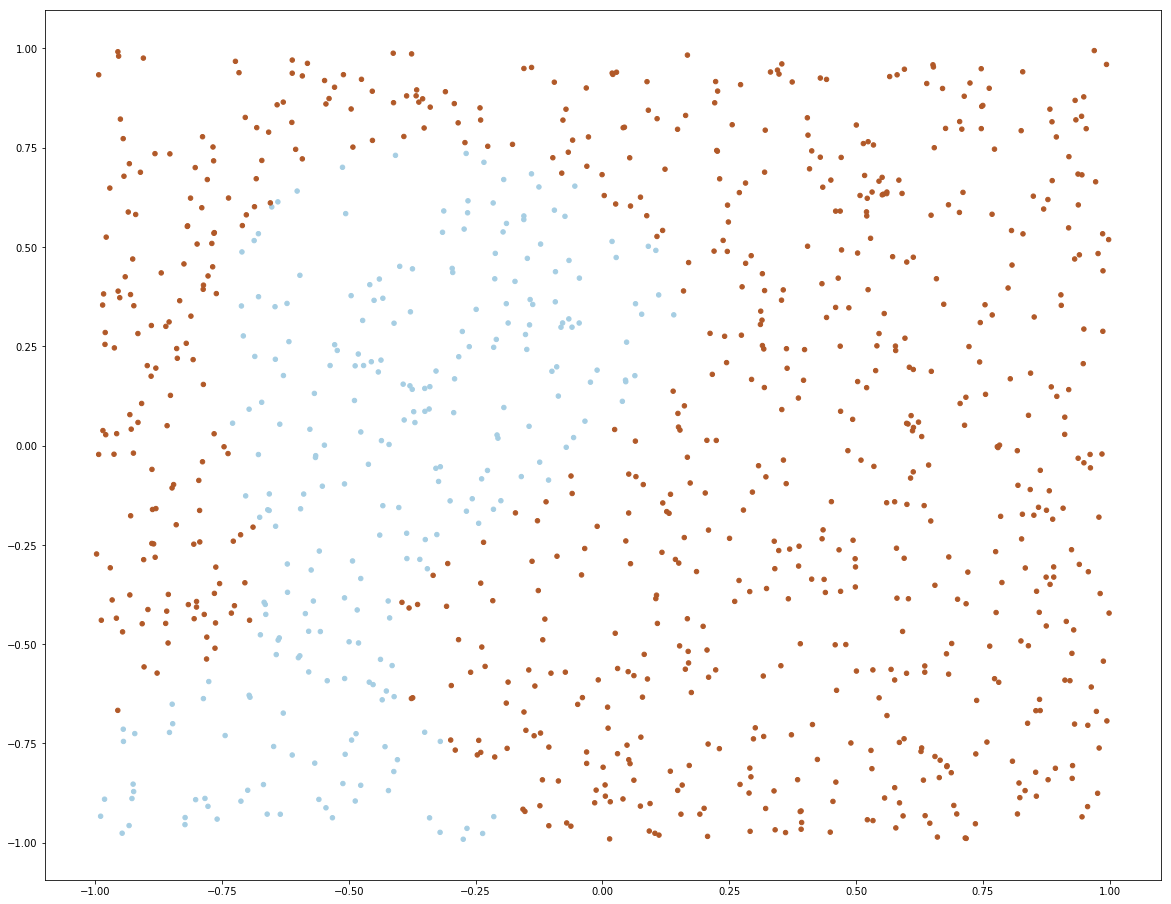

In [26]:
# streaming perceptron with kernels
import os, urllib
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    """ Simple helper function for downloading and loading data """
    filename = 'nonlinear_data.npz'
    if not os.path.exists(filename):
        os.system('wget https://users-cs.au.dk/jallan/ml/data/{0}'.format(filename))
    D = np.load(filename)
    return D

def visualize_kernel_perceptron(X, Y, w):
    """ Helper function for visualizing decision boundary in input space"""
    fig, ax = plt.subplots(figsize=(20, 16))
    ax.scatter(X[:, 0], X[:,1 ], c=Y, cmap=plt.cm.Paired, s=20)
    nsize = 50
    xs = ys = np.linspace(-1, 1, nsize)
    xm, ym = np.meshgrid(xs, ys)
    img = np.zeros((nsize, nsize)) # makes a 100 x 100 2d array
    for i, zy in enumerate(ys):
        for j, zx in enumerate(xs):    
            point = np.array([zx, zy])
            predict = w.dot(point)
            img[i, j] = predict
    ax.contour(xs, ys, img, [0], colors='r', linewidths=3)
    plt.show()

def get_rbf_kernel(gamma=1.0):
    assert gamma > 0, 'Gamma must be positive'
    def K(x, z):
        return np.exp((-gamma * np.sum((x-z)**2)))
    return K

class Representer():
    """ Represents a hyperplane H in Feature space that is a linear combination of transformed points from input space
        
        The class can evaluate an input in the original input space mapped to H against the hyperplane        
    """
    def __init__(self, K):
        self.dat = list()
        self.alpha = list()
        self.K = K

    def update(self, x, a):
        """ Update hyperplane Representer by point x with weight a i.e. w = w +  * x
        
        Args:
            x: np.array - data point
            a: float - data weight
        """
        ### YOUR CODE HERE
        ### END CODE

    def dot(self, z):
        """ compute inner product between hyperplane and z in feature (kernel) space
        i.e. <phi(w), phi(z)>
        
        Args:
            z: np.array
        """
        ### YOUR CODE HERE
        ### END CODE
        return out
    
class KernelPerceptron():
    
    def __init__(self, K):
        self.K = K
        self.w = None
    
    def fit(self, X, Y, K, alpha=0.1):
        """ Kernel Perception Algorithm 
            1. Set initial hyperplane i.e. make representation of w to initial value like phi(0) with weight 1
            2. Do one pass over the data - for each misprediction add phi(x) with weight y * alpha to hyperplane representation
            
        """
        w = Representer(self.K)
        ### YOUR CODE HERE
        ### END CODE
        
    def score(self, X, y):
        """ Compute Classifier Accuracy
        Args:
          X: np.array n, d
          y: np.array n, 
        
        Returns:
        out: scalar - accuracy of model on data X with labels Y
        """
        out = None
        ### YOUR CODE HERE
        ### END CODE
        return out
            
    

D = load_data()
X = D['X4']
Y = D['y4']
rbf_kernel = get_rbf_kernel(1.0)
kernel_perceptron_classifier = KernelPerceptron(rbf_kernel)
kernel_perceptron_classifier.fit(X, Y, rbf_kernel)
print('In Sample Accuracy after one scan: {0}'.format(kernel_perceptron_classifier.score(X, Y)))
visualize_kernel_perceptron(X, Y, kernel_perceptron_classifier.w)
